In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [4]:
target = df.Survived
inputs = df.drop('Survived' , axis='columns')

In [5]:
dummies = pd.get_dummies(inputs.Sex)
dummies = dummies.astype(int)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [6]:
inputs = pd.concat([inputs, dummies], axis='columns')
inputs

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,1
887,1,female,19.0,30.0000,1,0
888,3,female,NaN,23.4500,1,0
889,1,male,26.0,30.0000,0,1


In [7]:
inputs.drop('Sex' , axis='columns' , inplace=True)
inputs

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,NaN,23.4500,1,0
889,1,26.0,30.0000,0,1


In [8]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [9]:
inputs.Age
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
...,...,...,...,...,...
886,2,27.000000,13.0000,0,1
887,1,19.000000,30.0000,1,0
888,3,29.699118,23.4500,1,0
889,1,26.000000,30.0000,0,1


In [10]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(inputs , target , test_size=0.2)

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [12]:
model.fit(x_train , y_train)

accuracy = model.score(x_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7877094972067039


In [13]:
x_test

,Pclass,Age,Fare,female,male
821,3,27.000000,8.6625,0,1
735,3,28.500000,16.1000,0,1
222,3,51.000000,8.0500,0,1
844,3,17.000000,8.6625,0,1
90,3,29.000000,8.0500,0,1
...,...,...,...,...,...
604,1,35.000000,26.5500,0,1
667,3,29.699118,7.7750,0,1
769,3,32.000000,8.3625,0,1
285,3,33.000000,8.6625,0,1


In [14]:
y_test

821    1
735    0
222    0
844    0
90     0
      ..
604    1
667    0
769    0
285    0
657    0
Name: Survived, Length: 179, dtype: int64

In [15]:
predictions = model.predict(x_test)
print("Predictions:")
print(predictions)

Predictions:
[0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0
 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1]


In [16]:
probabilities = model.predict_proba(x_test)
print("Probabilities:")
print(probabilities)

Probabilities:
[[9.89816635e-01 1.01833655e-02]
 [9.90181823e-01 9.81817688e-03]
 [9.89070788e-01 1.09292123e-02]
 [9.86556434e-01 1.34435656e-02]
 [9.90128257e-01 9.87174316e-03]
 [9.80613994e-01 1.93860060e-02]
 [9.11659734e-03 9.90883403e-01]
 [7.33567261e-02 9.26643274e-01]
 [7.98535804e-01 2.01464196e-01]
 [6.51994929e-01 3.48005071e-01]
 [9.78923399e-01 2.10766007e-02]
 [1.03750775e-06 9.99998962e-01]
 [7.33567261e-02 9.26643274e-01]
 [9.90212293e-01 9.78770693e-03]
 [2.74810692e-02 9.72518931e-01]
 [8.88351004e-01 1.11648996e-01]
 [9.88175702e-01 1.18242982e-02]
 [5.00398256e-02 9.49960174e-01]
 [8.73605934e-01 1.26394066e-01]
 [6.45721886e-02 9.35427811e-01]
 [9.90684592e-01 9.31540819e-03]
 [9.90220635e-01 9.77936498e-03]
 [9.76710446e-01 2.32895545e-02]
 [6.46938098e-02 9.35306190e-01]
 [5.28123571e-03 9.94718764e-01]
 [9.88191156e-01 1.18088439e-02]
 [9.89750602e-01 1.02493984e-02]
 [3.56214057e-02 9.64378594e-01]
 [5.64879292e-02 9.43512071e-01]
 [8.67618514e-04 9.99132381e

In [17]:
survival_rates = df['Survived'].value_counts(normalize=True) * 100

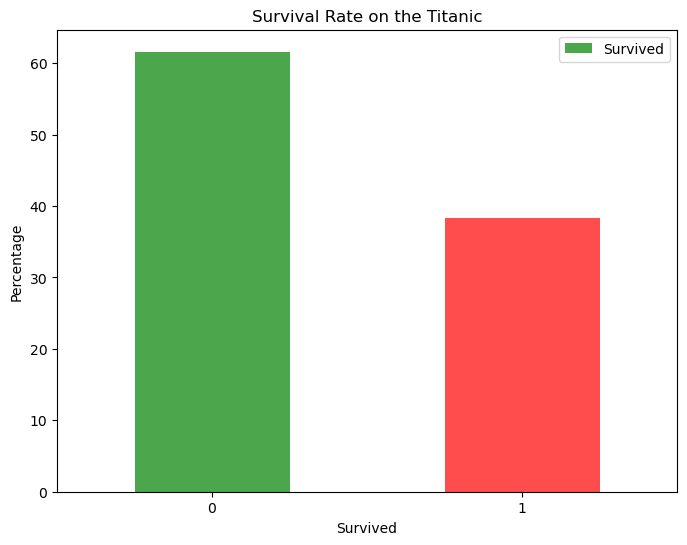

In [20]:
plt.figure(figsize=(8, 6))
survival_rates.plot(kind='bar', color=['green', 'red'], alpha=0.7)

plt.title('Survival Rate on the Titanic')
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['Survived', 'Not Survived'], loc='upper right')
plt.show()

In [21]:
survival_by_gender = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100

<Figure size 800x600 with 0 Axes>

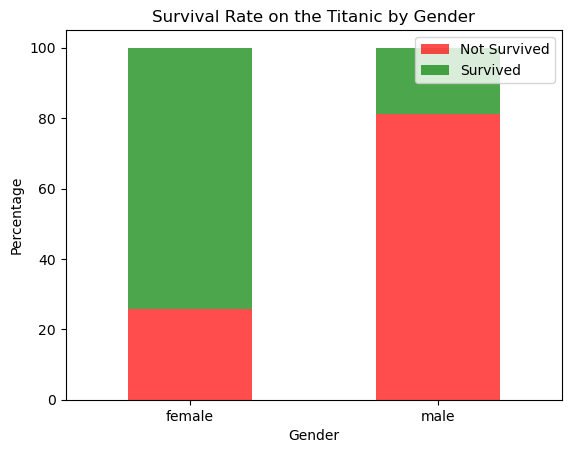

In [22]:
plt.figure(figsize=(8, 6))
survival_by_gender.plot(kind='bar', color=['red', 'green'], stacked=True, alpha=0.7)

plt.title('Survival Rate on the Titanic by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()